# Midterm project

## By Afrizal I. Yafi' and Fajri Ahmad N.

<br> <br>

### Ref:

* https://youtu.be/PUMMCLrVn8A

---

In [ ]:
# Install lib yang digunakan
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 KB 4.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd  # Mengimpor library pandas dan memberikan alias pd.
from tqdm.notebook import tqdm  # Mengimpor fungsi tqdm dari library tqdm.notebook. Fungsi tqdm digunakan untuk menampilkan progress bar pada saat mengambil data tweet.
import snscrape.modules.twitter as sntwitter  # Mengimpor modul Twitter dari library snscrape dan memberikan alias sntwitter. Modul ini digunakan untuk mengambil data tweet dari Twitter.
import networkx as nx  # Mengimpor library NetworkX dan memberikan alias nx. Library NetworkX digunakan untuk membangun graf untuk melakukan analisis jaringan.
import matplotlib.pyplot as plt  # Mengimpor library pyplot dari library Matplotlib dan memberikan alias plt. Library Matplotlib digunakan untuk membuat visualisasi grafik.
import warnings  # Mengimpor library warnings.
warnings.filterwarnings('ignore')  # Mengaktifkan mode peringatan 'ignore' pada library warnings, yang akan menonaktifkan semua peringatan yang akan dikeluarkan oleh Python.

In [ ]:
# Membuat list untuk menyimpan data
listTweets = []

# Menentukan jumlah maksimum tweet yang akan dicrawl
nTweets = 1500

# Menggunakan TwitterSearchScraper untuk crawling data dan menambahkan tweet ke list
for i, tweet in tqdm(enumerate(sntwitter.TwitterSearchScraper('#Coachella min_faves:1000 min_retweets:100 lang:en  -filter:replies').get_items()), total=nTweets + 1):
    if i > nTweets:  # Jika i melebihi nTweets, maka keluar dari loop
        break
    # Menambahkan tweet ke dalam listTweets dengan mengambil informasi tanggal, id tweet, isi tweet, dan username pengguna
    listTweets.append([tweet.date, tweet.id, tweet.content, tweet.user.username])

# Membuat dataframe dari list    
twtDataFrame = pd.DataFrame(listTweets, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

# Menyimpan list dalam bentuk csv
twtDataFrame.to_csv("getDataCoachella.csv", index=False)

  0%|          | 0/1501 [00:00<?, ?it/s]

In [ ]:
# menampilkan jumlah pada setiap kolom.
twtDataFrame.count()

Datetime    1501
Tweet Id    1501
Text        1501
Username    1501
dtype: int64

In [ ]:
# Menampilkan jumlah nilai yang tidak null pada setiap kolom.
twtDataFrame.isnull().sum()

Datetime    0
Tweet Id    0
Text        0
Username    0
dtype: int64

In [ ]:
# Melakukan pembacaan data
dataSet = pd.read_csv("getDataCoachella.csv")
dataSet

,Datetime,Tweet Id,Text,Username
0,2023-04-09 23:43:18+00:00,1645210812200386565,".@BMW via Instagram. \n\n""Feeling ultra nostal...",FrankOceanToday
1,2023-03-21 19:10:00+00:00,1638256663315509251,remember when @BLACKPINK played #coachella in ...,youtubemusic
2,2023-03-09 18:00:01+00:00,1633890397075144704,when you hear @BLACKPINK performing from acros...,youtubemusic
3,2023-01-14 13:38:21+00:00,1614255602896863234,Congratulations Rosé. BLACKPINK is headlining ...,YoshikiOfficial
4,2023-01-13 03:38:44+00:00,1613742316052951041,Finally happened.. 🥹 #coachella https://t.co/y...,_DPRREM
...,...,...,...,...
1496,2015-04-13 06:27:19+00:00,587502305387229186,I'm waiting for drake to set himself on fire a...,diplo
1497,2015-04-13 06:20:43+00:00,587500645965398016,Holy shit Hillary Clinton is singing with Drak...,UncleBlazer
1498,2015-04-12 20:15:24+00:00,587348312505720832,"Watch @MartinGarrix​ talk new music, working w...",billboard
1499,2015-04-12 19:15:17+00:00,587333182048972800,View from the Ferris wheel @coachella #ViewFro...,tiesto


In [ ]:
# Melakukan penghapusan data yang kosong
dataSet = dataSet.loc[:, ['Tweet Id', 'Username']] #Memilih kolom 'Tweet Id' dan 'Username' dari DataFrame dataSet dan menyimpannya kembali ke variabel dataSet.
dataSet.dropna() #Menghapus semua baris yang mengandung nilai kosong dalam DataFrame dataSet
dataSet.head(10) #Menampilkan 10 baris teratas dari DataFrame dataSet yang telah diubah dan diperbarui.

,Tweet Id,Username
0,1645210812200386565,FrankOceanToday
1,1638256663315509251,youtubemusic
2,1633890397075144704,youtubemusic
3,1614255602896863234,YoshikiOfficial
4,1613742316052951041,_DPRREM
5,1613310674326913024,billboard
6,1612989988211392512,ygent_official
7,1612989461314564098,BLACKPINK
8,1612942366209458177,UPROXX
9,1612935545419870208,LaUnicaUpdates


In [ ]:
# Melakukan pemasukan data kedalam bentuk graf

#Membuat graf grpTemp menggunakan fungsi from_pandas_edgelist() dari library NetworkX dengan argumen dataSet,
#yang berisi informasi mengenai tweet ID dan username, dan kolom "Username" sebagai sumber node dan kolom "Tweet Id" sebagai target node.
grpTemp = nx.from_pandas_edgelist(dataSet,source="Username",target="Tweet Id")

# Menampilkan jumlah node dalam graf grpTemp dengan menggunakan fungsi len() dan method nodes().
# Hasilnya akan ditampilkan dalam format string yang berisi kata "Jumlah Nodes" dan jumlah node dalam graf.
print('Jumlah Nodes',len(grpTemp.nodes()))

# Menampilkan jumlah edge dalam graf grpTemp dengan menggunakan fungsi len() dan method edges().
# Hasilnya akan ditampilkan dalam format string yang berisi kata "Jumlah Edges" dan jumlah edge dalam graf.
print('Jumlah Edges',len(grpTemp.edges()))

Jumlah Nodes 1966
Jumlah Edges 1501


In [ ]:
# Melakukan kalkulasi dengan metode Degree Centrality

# Menghitung degree centrality dari graf graph_temp menggunakan fungsi degree_centrality() dari library NetworkX dan menyimpan hasilnya ke dalam variabel degreeCentrality.
degreeCentrality = nx.degree_centrality(graph_temp)

# Mencetak dictionary dengan key yang merupakan nama node dan value yang merupakan nilai degree centrality-nya.
print(degreeCentrality)

{'FrankOceanToday': 0.0005089058524173028, 1645210812200386565: 0.0005089058524173028, 'youtubemusic': 0.0015267175572519084, 1638256663315509251: 0.0005089058524173028, 1633890397075144704: 0.0005089058524173028, 'YoshikiOfficial': 0.02391857506361323, 1614255602896863234: 0.0005089058524173028, '_DPRREM': 0.0005089058524173028, 1613742316052951041: 0.0005089058524173028, 'billboard': 0.0371501272264631, 1613310674326913024: 0.0005089058524173028, 'ygent_official': 0.002035623409669211, 1612989988211392512: 0.0005089058524173028, 'BLACKPINK': 0.0005089058524173028, 1612989461314564098: 0.0005089058524173028, 'UPROXX': 0.0015267175572519084, 1612942366209458177: 0.0005089058524173028, 'LaUnicaUpdates': 0.0005089058524173028, 1612935545419870208: 0.0005089058524173028, 'BuzzingPop': 0.002544529262086514, 1612935352435490816: 0.0005089058524173028, 'WORLDMUSICAWARD': 0.0066157760814249365, 1612933731429543940: 0.0005089058524173028, 'teamwangofcl': 0.0015267175572519084, 1612933207137058

In [ ]:
# Melakukan looping untuk menghitung Degree pada nodes
temp = [] #Membuat list kosong yang bersifat temporary
degreeTemp = nx.degree(graph_temp) # Menghitung derajat setiap node dalam graf 
for i in degreeTemp: #Looping
    temp.append([i[0],i[1]]) #Menambahkan pasangan nilai (node, derajat) ke dalam list variale temp.
# Melakukan proses sorting
sorting = pd.DataFrame(temp)
sorting.sort_values(1,axis=0,ascending = False, inplace = True) #Melakukan sorting DataFrame sorting berdasarkan kolom kedua (derajat) secara descending menggunakan metode sort_values() dari library pandas.
sorting=sorting.rename(columns={0: "Username", 1: "Degree"}) #Mengganti nama kolom pertama dan kedua dalam DataFrame sorting menjadi Username dan Degree.
sorting.head() #Menampilkan 5 baris teratas dari DataFrame sorting yang berisi 5 node dengan derajat tertinggi.

,Username,Degree
113,UpdateHLD,158
38,PopCrave,111
9,billboard,73
59,hsdaily,72
89,PopBase,49


In [ ]:
# Melakukan proses kalkulasi data dengan metode Degree Centrality dan sorting dengan nilai tertinggi
degree = [] #Membuat list kosong dengan nama degree.

# Menghitung degree centrality setiap node dalam graf graph_temp menggunakan fungsi degree_centrality() dari library NetworkX, dan hasilnya disimpan dalam variabel top.
top = nx.degree_centrality(graph_temp)

#Looping melalui setiap item di top, dengan melakukan sorting descending berdasarkan nilai degree centrality.
for w2 in sorted(top, key=top.get, reverse = True):
    degree.append([w2, top[w2]]) #Menambahkan pasangan nilai (node, degree centrality) ke dalam list degree.
    
dataDegree = pd.DataFrame(Degree) #Membuat DataFrame dataDegree dari list degree.
dataDegree = dataDegree.rename(columns={0:"Username", 1:"Degree Centrality"}) #Mengganti nama kolom pertama dan kedua dalam DataFrame dataDegree menjadi Username dan Degree Centrality.
dataDegree.head() #Menampilkan 5 baris teratas dari DataFrame dataDegree yang berisi 5 node dengan degree centrality tertinggi.

,Username,Degree Centrality
0,UpdateHLD,0.080407
1,PopCrave,0.056489
2,billboard,0.037150
3,hsdaily,0.036641
4,PopBase,0.024936


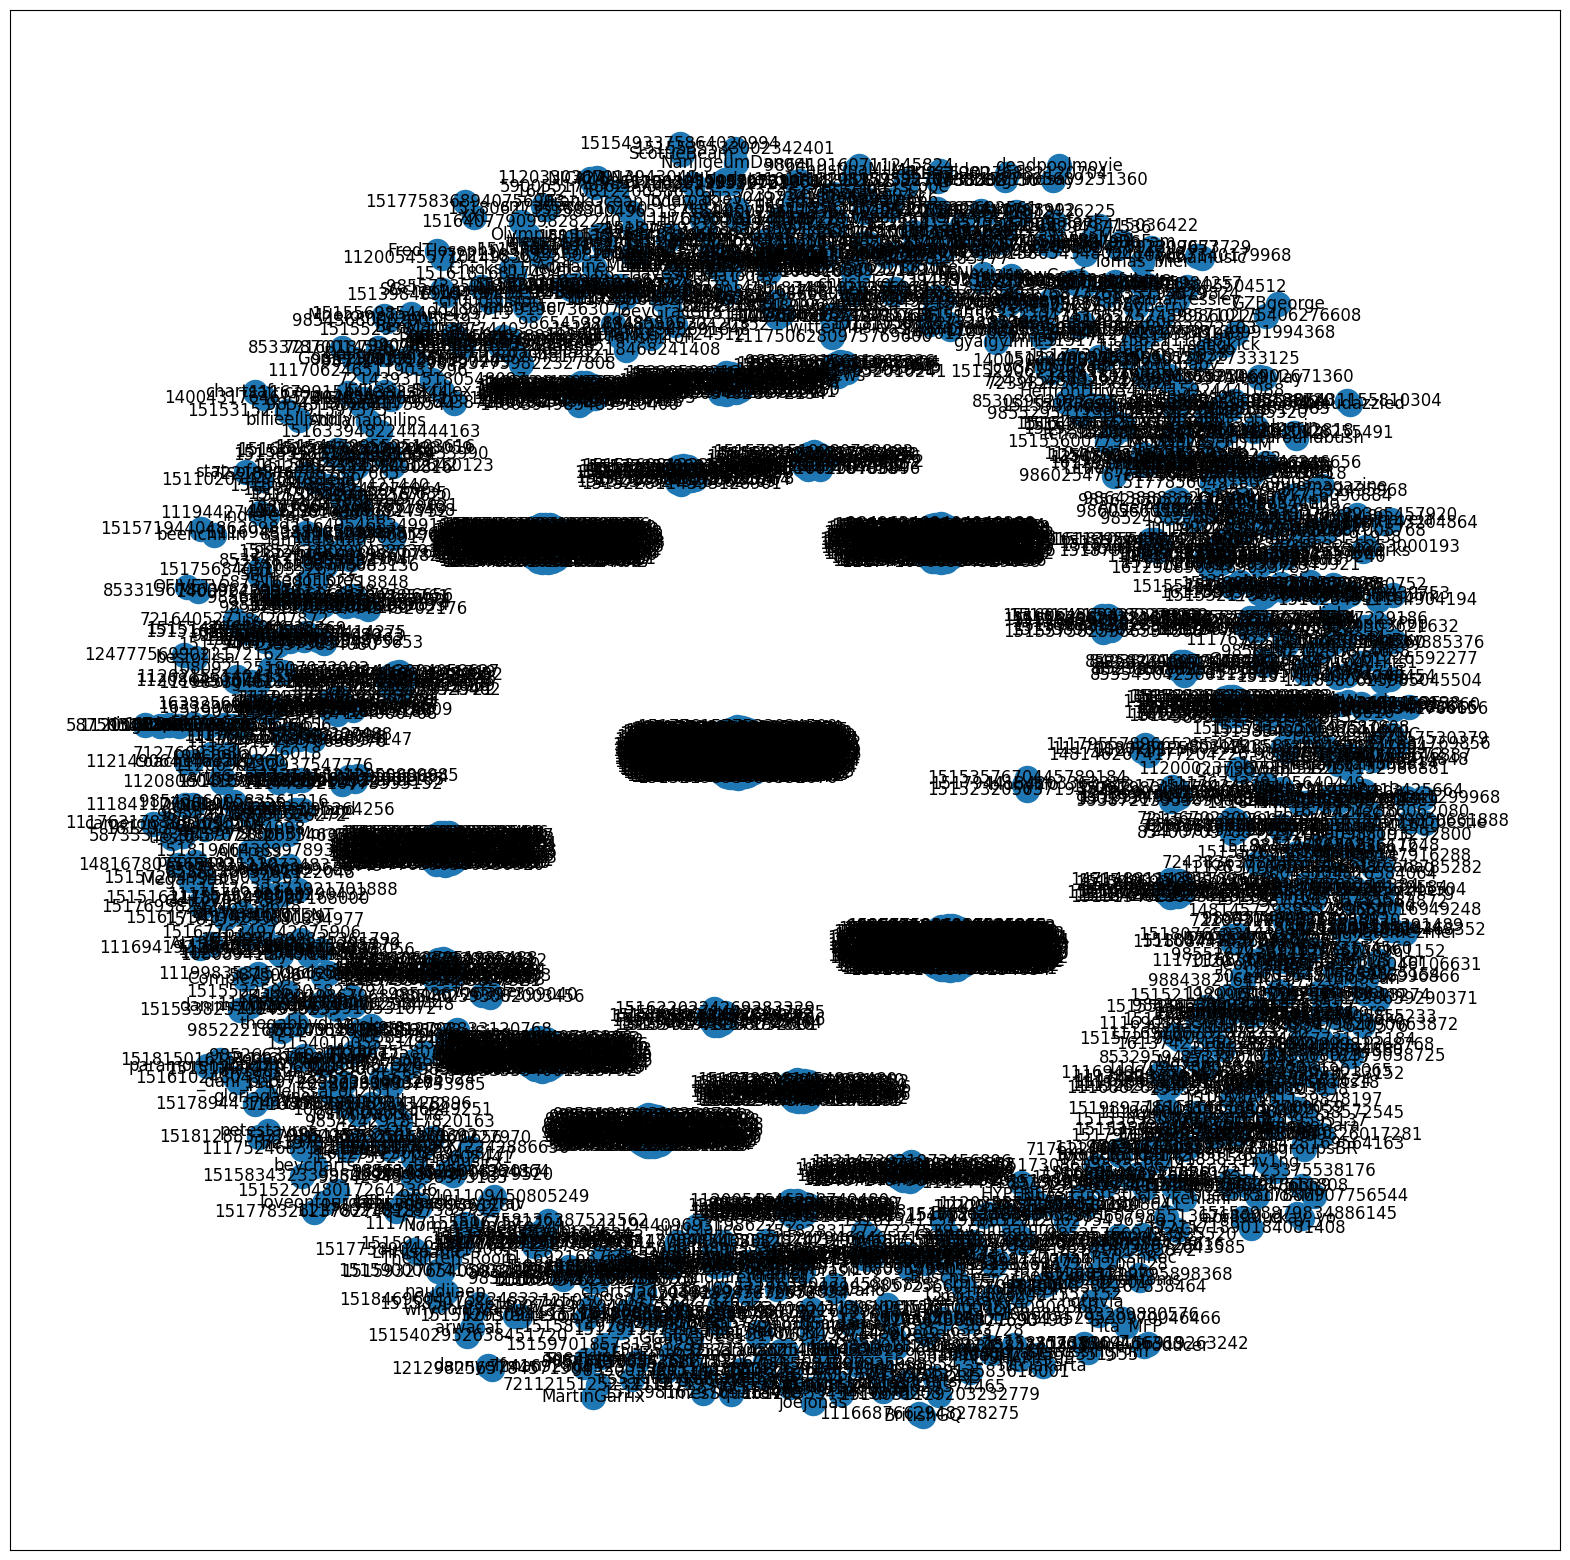

In [ ]:
# Visualisasi node pada dataset

#Membuat sebuah figure baru dengan ukuran 20x20 inci menggunakan fungsi figure() dari library matplotlib.
plt.figure(figsize=(20,20))

# Menggambar graf grpTemp dengan menggunakan fungsi draw_networkx() dari library NetworkX
# dengan argumen with_labels=True untuk menampilkan label pada setiap node.
# Visualisasi graf akan ditampilkan dalam figure yang dibuat pada baris sebelumnya.
nx.draw_networkx(grpTemp,with_labels=True)